In [89]:
import pandas as pd
import statistics
import math
df = pd.read_csv('influence.csv',index_col=0)

In [93]:
df

,node,ks,kdeg,pr,m
0,43434645,3,3,5.0,3
1,14155850,2,2,5.0,1057
2,18166688,8,8,5.0,2804
3,16941264,1,1,5.0,2692
4,44408160,4,4,5.0,286
5,16132243,5,5,5.0,496
6,84094897,12,12,5.0,9063
7,396238794,1,1,5.0,1
8,12502842,3,3,5.0,2805
9,42635188,6,6,5.0,3090


In [91]:
df = df.sort_values(by=['pr'])

In [92]:
df = df.reset_index(drop=True)

In [94]:
div = len(df)//5

In [95]:
bin1 = []
bin2 = []
bin3 = []
bin4 = []
bin5 = []

In [96]:
for i in range(len(df)):
    if i < div:
        bin1.append(df['m'][i])
    elif i >= div and i < div*2:
        bin2.append(df['m'][i])
    elif i >= div*2 and i < div*3:
        bin3.append(df['m'][i])
    elif i >= div*3 and i < div*4:
        bin4.append(df['m'][i])
    else:
        bin5.append(df['m'][i])

In [97]:
res1 = statistics.pstdev(bin1) 
res2 = statistics.pstdev(bin2)
res3 = statistics.pstdev(bin3) 
res4 = statistics.pstdev(bin4)
res5 = statistics.pstdev(bin5)
# Printing result 
print(res1,res2,res3,res4,res5) 

2838.1148673018856 3085.263197848767 3277.750448096987 3400.6646409194777 4294.573552752357


In [98]:
std = [res1,res2,res3,res4,res5]

In [86]:
#tdf = pd.DataFrame()

In [99]:
tdf['pr'] = std

In [100]:
tdf

,ks,kdeg,pr
0,1913.281213,1934.811877,2838.114867
1,2622.167996,2634.582699,3085.263198
2,2972.950386,3014.686883,3277.750448
3,3370.518061,3322.491986,3400.664641
4,4055.231313,4093.176517,4294.573553


In [110]:
tdf.to_csv('deviations1.csv')

In [97]:
tdf = pd.read_csv('deviations.csv', index_col = 0)

In [102]:
a = []
b = []
c = []
for i in range(len(tdf)):
    a.append(math.log(tdf['ks'][i]))
    b.append(math.log(tdf['kdeg'][i]))
    c.append(math.log(tdf['pr'][i]))

In [103]:
tdf['ks'] = a
tdf['kdeg'] = b
tdf['pr'] = c

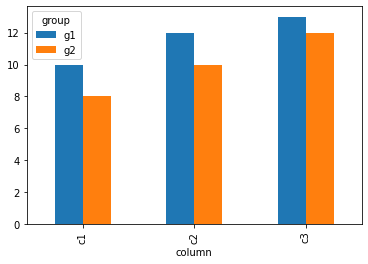

In [109]:
import matplotlib.pyplot as plt

testdf = pd.DataFrame([['g1','c1',10],['g1','c2',12],['g1','c3',13],['g2','c1',8],
                   ['g2','c2',10],['g2','c3',12]],columns=['group','column','val'])

testdf.pivot("column", "group", "val").plot(kind='bar')

plt.show()

In [107]:
testdf

,group,column,val
0,g1,c1,10
1,g1,c2,12
2,g1,c3,13
3,g2,c1,8
4,g2,c2,10
5,g2,c3,12


In [111]:
tdf1 = tdf/100
tdf1.to_csv('deviations2.csv')